# Coding Assignment 2: The Problem With Political Jokes Is That They Get Elected<sup>1</sup>

We know we didn't give you a ton of turn around time between the first coding assignment and this coding assignment, but we hope that you'll enjoy doing this assignment and seeing how we actually use data to address real political issues. As always, please come to us for assistance and office hours! 

Coding Assignment 2 will be due on **Friday, March 22 at 11:59 PM**. Note: This is the day before we leave for Spring Break. 

As it was for Coding Assignment 1, you may work with **one** other student on this assignment. Please fill in the cell below with the appropriate values, if applicable, for each variable.

In [1]:
NAME = ""
COLLABORATOR_NAME = ""

We will import the libraries/packages that you may need while doing this assignment. You **SHOULD NOT** change the below cell in any way. 

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Whereas the last assignment was very game theoretical, this assignment will have a very real and tangible outcome, which should give you a better sense of how we might apply basic data tools to confirm or reject your suspicions. Given that this assignment is entirely based on a real situation, we want to remind the class that we, as facilitators, are **NOT** taking a political stance by developing this assignment nor are we telling you that a political stance is better for any particular reason. We are **only** illustrating the idea that we can empirically confirm or reject suspicions that we come across. 

## 1. Introduction: The People Who Cast The Votes Decide Nothing; The People Who Count The Votes Decide Everything<sup>2</sup>

On November 6th, 2018, Mark Harris won the U.S. House of Representatives seat from North Carolina District 9. Upon completing the tally counts, Mark Harris led by 905.

We've already done some of the initial steps for you, which can often be the hardest part to any data analytics project. We've provided you with a question (is there evidence of election tampering in Bladen County, North Carolina) and datasets. We've already done a significant portion of the cleaning for you since it can often be highly technical and incredibly frustrating, but we left a portion of this for you to develop an intuition for data cleaning.

In [3]:
election_results = Table.read_table("nc_election_results_11062018.csv")
election_results

County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct
ALAMANCE,11/06/2018,064,1228,S,NC COURT OF APPEALS JUDGE SEAT 3,"Michael Monaco, Sr.",LIB,1,59,65,2,1,127,Y
ALAMANCE,11/06/2018,03N,1228,S,NC COURT OF APPEALS JUDGE SEAT 3,"Michael Monaco, Sr.",LIB,1,59,38,1,0,98,Y
ALAMANCE,11/06/2018,03S,1228,S,NC COURT OF APPEALS JUDGE SEAT 3,"Michael Monaco, Sr.",LIB,1,106,108,0,3,217,Y
ALAMANCE,11/06/2018,04,1228,S,NC COURT OF APPEALS JUDGE SEAT 3,"Michael Monaco, Sr.",LIB,1,67,38,1,0,106,Y
ALAMANCE,11/06/2018,035,1228,S,NC COURT OF APPEALS JUDGE SEAT 3,"Michael Monaco, Sr.",LIB,1,73,54,1,1,129,Y
ALAMANCE,11/06/2018,07,1228,S,NC COURT OF APPEALS JUDGE SEAT 3,"Michael Monaco, Sr.",LIB,1,43,33,2,0,78,Y
ALAMANCE,11/06/2018,09S,1228,S,NC COURT OF APPEALS JUDGE SEAT 3,"Michael Monaco, Sr.",LIB,1,83,59,2,0,144,Y
ALAMANCE,11/06/2018,12S,1228,S,NC COURT OF APPEALS JUDGE SEAT 3,"Michael Monaco, Sr.",LIB,1,15,5,0,0,20,Y
ALAMANCE,11/06/2018,03N2,1273,S,NC DISTRICT COURT JUDGE DISTRICT 15A SEAT 1,Brad Allen,DEM,1,217,81,18,0,316,Y
ALAMANCE,11/06/2018,03W,1273,S,NC DISTRICT COURT JUDGE DISTRICT 15A SEAT 1,Brad Allen,DEM,1,459,538,20,2,1019,Y


One thing you should notice is that all the values in the first column ("County") are the same. Another thing you should notice is that there are 183544 rows omitted. 

**1.1**: How many rows are you in the `election_results` table? How many columns are in the `election_results` table?

In [4]:
print("There are " + str(election_results.num_rows) + " rows.")
print("There are " + str(election_results.num_columns) + " columns.")

There are 183554 rows.
There are 15 columns.


As you can tell, there's a lot of data here. Some of it is pretty useful, but there are 183,554 rows so let's filter out only what's necessary. The dataset here represents all of the contests in the November 2018 elections in North Carolina. We only care about US Congressional District 09, which is the election Mark Harris was involved in. 

**1.2**: Create a new table that only contains data regarding the US House of Representatives District 09 election.

In [7]:
# Create a new table that only contains data dealing with the US HOUSE OF REPRESENTATIVES DISTRICT 09 election
district9 = election_results.where("Contest Name", are.equal_to("US HOUSE OF REPRESENTATIVES DISTRICT 09"))
district9.show(10)

County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct
BLADEN,11/06/2018,P45,1183,S,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,1,60,0,0,0,60,Y
BLADEN,11/06/2018,P202,1183,S,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,1,210,0,0,0,210,Y
BLADEN,11/06/2018,P60,1183,S,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,1,289,0,0,0,289,Y
BLADEN,11/06/2018,P35,1183,S,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,1,89,0,0,0,89,Y
BLADEN,11/06/2018,P15,1183,S,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,1,224,0,0,0,224,Y
BLADEN,11/06/2018,P201,1183,S,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,1,104,0,0,0,104,Y
BLADEN,11/06/2018,PROVISIONAL,1183,S,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,1,0,0,0,5,5,N
BLADEN,11/06/2018,ONE STOP LIBRARY,1183,S,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,1,0,1906,0,0,1906,N
BLADEN,11/06/2018,P40,1183,S,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,1,98,0,0,0,98,Y
BLADEN,11/06/2018,P10,1183,S,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,1,103,0,0,0,103,Y


Our dataset is significantly smaller, which makes it easier to work with so that might be able to answer our questions about whether Mark Harris engaged in election fraud. Not all of these columns are useful. Some columns are repetitive to the identifying information that we are trying to track—these include the Contest Group ID and Contest Type. These columns are reflected in the Contest Name column by the full race name. When cleaning the dataset, we can take out repetitive information that won't be useful to our data analysis. Therefore, we should drop somre columms from our table.

**1.3**: Drop "Contest Group ID", "Contest Type", and "Vote For" from the `district9` table.

In [8]:
district9 = district9.drop("Contest Group ID", "Contest Type" ,"Vote For")
district9

County,Election Date,Precinct,Contest Name,Choice,Choice Party,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct
BLADEN,11/06/2018,P45,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,60,0,0,0,60,Y
BLADEN,11/06/2018,P202,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,210,0,0,0,210,Y
BLADEN,11/06/2018,P60,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,289,0,0,0,289,Y
BLADEN,11/06/2018,P35,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,89,0,0,0,89,Y
BLADEN,11/06/2018,P15,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,224,0,0,0,224,Y
BLADEN,11/06/2018,P201,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,104,0,0,0,104,Y
BLADEN,11/06/2018,PROVISIONAL,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,0,0,0,5,5,N
BLADEN,11/06/2018,ONE STOP LIBRARY,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,0,1906,0,0,1906,N
BLADEN,11/06/2018,P40,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,98,0,0,0,98,Y
BLADEN,11/06/2018,P10,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,103,0,0,0,103,Y


It's always worthwhile to make sure that you understand what each of the columns represent. Sometimes, that requires you to do some external research so that you can effectively analyze the data that you have. 

**1.4**: Explain how the `Election Day`, `One Stop`, `Absentee by Mail`, `Provisional`, and `Total Votes` columns differ. 

YOUR ANSWER HERE: 

## 2. Bladen County: I Don't Know Much About Americanism, But It's a Damn Good Word With Which To Carry An Election<sup>3</sup>

**MORE CONTEXT HERE**
- Investigations on election fraud in District 9 of North Carolina were actually opened in 2016. They largely centered around Leslie McCrae Dowless, a former convicted felon with numerous charges of fraud who also happened to work on the Mark Harris campaign.
- After examining the circumstances regarding the 2018 House elections, the state elections board refused to certify the election results and unanimously voted to throw out the 2018 election results.
- Election officials in North Carolina ordered a special election to take place. McCreary, the Democratic candidate, will be campaigning again, though Harris, the Republican candidate, will not.

More information can be found at the end of this assignment

**2.1**: Create a table that has all the precincts of Bladen County.

***WARNING***: Even though it's displayed as "BLADEN," you have to use the string "\nBLADEN" instead. 

In [9]:
# Create a table with all the precincts within Bladen County. Remember to use "\nBLADEN"!
bladen = district9.where("County", are.equal_to("\nBLADEN"))
bladen

County,Election Date,Precinct,Contest Name,Choice,Choice Party,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct
BLADEN,11/06/2018,P45,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,60,0,0,0,60,Y
BLADEN,11/06/2018,P202,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,210,0,0,0,210,Y
BLADEN,11/06/2018,P60,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,289,0,0,0,289,Y
BLADEN,11/06/2018,P35,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,89,0,0,0,89,Y
BLADEN,11/06/2018,P15,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,224,0,0,0,224,Y
BLADEN,11/06/2018,P201,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,104,0,0,0,104,Y
BLADEN,11/06/2018,PROVISIONAL,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,0,0,0,5,5,N
BLADEN,11/06/2018,ONE STOP LIBRARY,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,0,1906,0,0,1906,N
BLADEN,11/06/2018,P40,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,98,0,0,0,98,Y
BLADEN,11/06/2018,P10,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,103,0,0,0,103,Y


**2.2**: How many votes did Mark Harris win Bladen County by?

*HINT #1*: Grouping works by aggregating a bunch of related information together. So far, we've only put the column as an argument in the `group` function, but we can also add a second argument that dictates what function we use to aggregate all the data together. This will give a lot of information that doesn't make any sense. Since the syntax is fairly new, we'll provide most of the code for this. 

In [10]:
# give everything except the column names
total_votes = bladen.group("Choice", sum).select('Choice', 'Total Votes sum').relabeled("Total Votes sum", "Total Votes")
total_votes

Choice,Total Votes
Dan McCready,3856
Jeff Scott,129
Mark Harris,5413


**2.3**: What percentage of the "Total Votes" were "Absentee by Mail"?

*HINT #1*: `table_name['column name']` takes the column as makes it an array where `table_name` and `'column name'` are placeholders for the actual value that you should use.

*HINT #2*: `sum(array)` returns the sum of the array that is passed in where `array` represents a placeholder for the actual value that you should use.

*HINT #3*: Complete the `percent` function because it may be useful later. 

In [11]:
# The percent function should return the percentage of a to b
# Example: percent(9, 10) should return 90, not 0.9
def percent(a, b): 
    return (a / b) * 100

In [12]:
assert percent(2, 5) == 40
assert percent(-1, 5) == -20
assert round(percent(1, 3), 2) == 33.33

In [13]:
bladen_absentee_by_mail = sum(bladen['Absentee by Mail'])
bladen_total_votes = sum(bladen['Total Votes'])

percentage = percent(bladen_absentee_by_mail, bladen_total_votes)

print("Absentee by mail ballots represent " + str(percentage) + \
      "% of the votes.")

Absentee by mail ballots represent 7.2781442860183025% of the votes.


In [14]:
assert round(percentage, 2) == 7.28

**2.4:** Create a table that has only the "ABSENTEE" precincts for Bladen County. 

*HINT*: Use a table that you've created earlier!

In [20]:
# Create a table with the "ABSENTEE" precincts of Bladen County
bladen_abs = bladen.where("Precinct", are.equal_to("ABSENTEE"))       
bladen_abs

County,Election Date,Precinct,Contest Name,Choice,Choice Party,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct
BLADEN,11/06/2018,ABSENTEE,US HOUSE OF REPRESENTATIVES DISTRICT 09,Dan McCready,DEM,0,0,258,0,258,N
BLADEN,11/06/2018,ABSENTEE,US HOUSE OF REPRESENTATIVES DISTRICT 09,Jeff Scott,LIB,0,0,6,0,6,N
BLADEN,11/06/2018,ABSENTEE,US HOUSE OF REPRESENTATIVES DISTRICT 09,Mark Harris,REP,0,0,420,0,420,N


In [21]:
assert (bladen_abs.num_rows, bladen_abs.num_columns) == (3, 12)
assert all(bladen_abs['County'] == \
           np.array(['\nBLADEN', '\nBLADEN', '\nBLADEN']))
assert sum(bladen_abs['Total Votes']) == 684.0

**2.5**: In Bladen County, what percentage of the absentee by mail votes were won by Mark Harris?

*HINT #1*: Call a function that you've already written.

In [22]:
mh_absentee_votes = bladen_abs.column("Absentee by Mail")[2]
mark_harris_abs_percent = percent(mh_absentee_votes, bladen_absentee_by_mail)
mark_harris_abs_percent

61.40350877192983

In [23]:
assert round(mark_harris_abs_percent, 2) == 61.40

Often times, we have to introduce new datasets in order to have a more comprehensive analysis. North Carolina also releases data on voters who request absentee ballots. To understand whether the 61.4% of absentee ballot votes for Mark Harris is significant, we need to know what percent of the vote we expect Mark Harris to receive. 

In [24]:
bladen_absentees = Table.read_table("bladen.csv")
bladen_absentees.show(10)

county_desc,voter_reg_num,ncid,voter_last_name,voter_first_name,voter_middle_name,race,gender,age,voter_street_address,voter_city,voter_state,voter_zip,ballot_mail_street_address,ballot_mail_city,ballot_mail_state,ballot_mail_zip,other_mail_addr1,other_mail_addr2,other_city_state_zip,election_dt,voter_party_code,precinct_desc,cong_dist_desc,nc_house_desc,nc_senate_desc,ballot_req_delivery_type,ballot_req_type,ballot_request_party,ballot_req_dt,ballot_send_dt,ballot_rtn_dt,ballot_rtn_status,site_name,sdr,mail_veri_status
BLADEN,58945,AJ43421,ABBEY,AMANDA,SMITH,BLACK or AFRICAN AMERICAN,F,47,160 LAKEWOOD RD,ELIZABETHTOWN,NC,28337,,,,,,,,11/6/18,DEM,CENTRAL,CONGRESSIONAL DISTRICT 9,NC HOUSE DISTRICT 22,NC SENATE DISTRICT 8,IN PERSON,ONE-STOP,DEM,10/29/18,10/29/18,10/29/18,ACCEPTED,BLADEN COUNTY PUBLIC LIBRARY,,
BLADEN,58498,AJ43169,ABBEY,RASHAUNDA,DALAJA,BLACK or AFRICAN AMERICAN,F,20,2899 ELKTON RD,CLARKTON,NC,28433,,,,,,,,11/6/18,DEM,BROWN MARSH,CONGRESSIONAL DISTRICT 7,NC HOUSE DISTRICT 22,NC SENATE DISTRICT 8,IN PERSON,ONE-STOP,DEM,11/2/18,11/2/18,11/2/18,ACCEPTED,BLADEN COUNTY PUBLIC LIBRARY,,
BLADEN,53346,AJ39560,ABBOTT,RANDOLPH,SYLVESTER,BLACK or AFRICAN AMERICAN,M,80,404 DAVID ST,ELIZABETHTOWN,NC,28337,,,,,,,,11/6/18,DEM,ELIZABETHTOWN #2,CONGRESSIONAL DISTRICT 7,NC HOUSE DISTRICT 22,NC SENATE DISTRICT 8,IN PERSON,ONE-STOP,DEM,10/25/18,10/25/18,10/25/18,ACCEPTED,BLADEN COUNTY PUBLIC LIBRARY,,
BLADEN,34672,AJ24541,ADAMS,ANTONIO,W,BLACK or AFRICAN AMERICAN,M,44,2343 MERCER MILL/BROWN MARSH RD,ELIZABETHTOWN,NC,28337,,,,,,,,11/6/18,DEM,ELIZABETHTOWN #2,CONGRESSIONAL DISTRICT 7,NC HOUSE DISTRICT 22,NC SENATE DISTRICT 8,IN PERSON,ONE-STOP,DEM,11/1/18,11/1/18,11/1/18,ACCEPTED,BLADEN COUNTY PUBLIC LIBRARY,,
BLADEN,27124,AJ20437,ADAMS,CHARLES,GREGORY,BLACK or AFRICAN AMERICAN,M,53,131 JOHNSON RD,ELIZABETHTOWN,NC,28337,,,,,,,,11/6/18,DEM,ELIZABETHTOWN #1,CONGRESSIONAL DISTRICT 9,NC HOUSE DISTRICT 22,NC SENATE DISTRICT 8,IN PERSON,ONE-STOP,DEM,10/22/18,10/22/18,10/22/18,ACCEPTED,BLADEN COUNTY PUBLIC LIBRARY,,
BLADEN,52302,AJ38775,ADAMS,CRYSTAL,LYNN,WHITE,F,53,303 PECAN ST #9A,BLADENBORO,NC,28320,303 PECAN ST # 9A,BLADENBORO,NC,28320,nan,nan,nan,11/6/18,UNA,BLADENBORO #2,CONGRESSIONAL DISTRICT 9,NC HOUSE DISTRICT 22,NC SENATE DISTRICT 8,MAIL,MAIL,UNA,10/4/18,10/5/18,nan,nan,nan,,
BLADEN,10818,AJ8344,ADAMS,FRANCES,GOODEN,WHITE,F,85,5725 NC 242 HWY S,ELIZABETHTOWN,NC,28337,5725 NC 242 HWY S,ELIZABETHTOWN,NC,28337,nan,nan,nan,11/6/18,UNA,ELIZABETHTOWN #1,CONGRESSIONAL DISTRICT 9,NC HOUSE DISTRICT 22,NC SENATE DISTRICT 8,MAIL,MAIL,UNA,10/5/18,10/8/18,10/20/18,ACCEPTED,nan,,
BLADEN,41763,AJ29556,ADAMS,LATOYA,SHANT'E,BLACK or AFRICAN AMERICAN,F,34,11436 NC 242 HWY S,BLADENBORO,NC,28320,11436 NC 242 HWY S,BLADENBORO,NC,28320,nan,nan,nan,11/6/18,UNA,BLADENBORO #2,CONGRESSIONAL DISTRICT 9,NC HOUSE DISTRICT 22,NC SENATE DISTRICT 8,MAIL,MAIL,UNA,4/3/18,9/21/18,nan,nan,nan,,
BLADEN,50008,AJ37032,ADAMS,MARY,FRANCES,WHITE,F,66,11316 CENTER RD,BLADENBORO,NC,28320,11316 CENTER RD,BLADENBORO,NC,28320,nan,nan,nan,11/6/18,UNA,BLADENBORO #2,CONGRESSIONAL DISTRICT 9,NC HOUSE DISTRICT 22,NC SENATE DISTRICT 8,MAIL,MAIL,UNA,4/25/18,9/21/18,10/15/18,ACCEPTED,nan,,
BLADEN,22374,AJ16327,ADAMS,MARY,EVETTE,BLACK or AFRICAN AMERICAN,F,51,2343 MERCER MILL/BROWN MARSH RD,ELIZABETHTOWN,NC,28337,,,,,,,,11/6/18,DEM,ELIZABETHTOWN #2,CONGRESSIONAL DISTRICT 7,NC HOUSE DISTRICT 22,NC SENATE DISTRICT 8,IN PERSON,ONE-STOP,DEM,10/23/18,10/23/18,10/23/18,ACCEPTED,BLADEN COUNTY PUBLIC LIBRARY,,


The dataset we provide on absentee ballots has a lot of extraneous information that we don't totally care about so let's clean it up. We won't break it into as many components this time as we did the first time. 

**2.6**: Clean up the `bladen_absentees` table so that we only have rows and columns that we care about. We want only rows that deal with "CONGRESSIONAL DISTRICT 9". At the very minimum, we want the `ballot_req_delivery_type`, `ballot_req_type`, `ballot_request_party`, `ballot_rtn_status`, and some sort of unique identifier for each voter. While it isn't totally necessary to, include the `county_desc` and `cong_dist_desc` columns as well

*HINT #1*: Sometimes, `select` is better than `drop`. 

In [25]:
bladen_abs_d9 = bladen_absentees.where("cong_dist_desc", \
                    are.equal_to("CONGRESSIONAL DISTRICT 9"))
bladen_abs_d9 = bladen_abs_d9.select("county_desc", "ncid", \
                                     "cong_dist_desc", \
                                    "ballot_req_delivery_type", \
                                    "ballot_req_type", \
                                    "ballot_request_party", \
                                    "ballot_rtn_status")
bladen_abs_d9

county_desc,ncid,cong_dist_desc,ballot_req_delivery_type,ballot_req_type,ballot_request_party,ballot_rtn_status
BLADEN,AJ43421,CONGRESSIONAL DISTRICT 9,IN PERSON,ONE-STOP,DEM,ACCEPTED
BLADEN,AJ20437,CONGRESSIONAL DISTRICT 9,IN PERSON,ONE-STOP,DEM,ACCEPTED
BLADEN,AJ38775,CONGRESSIONAL DISTRICT 9,MAIL,MAIL,UNA,nan
BLADEN,AJ8344,CONGRESSIONAL DISTRICT 9,MAIL,MAIL,UNA,ACCEPTED
BLADEN,AJ29556,CONGRESSIONAL DISTRICT 9,MAIL,MAIL,UNA,nan
BLADEN,AJ37032,CONGRESSIONAL DISTRICT 9,MAIL,MAIL,UNA,ACCEPTED
BLADEN,AJ22931,CONGRESSIONAL DISTRICT 9,IN PERSON,ONE-STOP,DEM,ACCEPTED
BLADEN,AJ7473,CONGRESSIONAL DISTRICT 9,IN PERSON,ONE-STOP,DEM,ACCEPTED
BLADEN,AJ7474,CONGRESSIONAL DISTRICT 9,IN PERSON,ONE-STOP,DEM,ACCEPTED
BLADEN,AJ42469,CONGRESSIONAL DISTRICT 9,IN PERSON,ONE-STOP,DEM,ACCEPTED


In [26]:
assert (bladen_abs_d9.num_rows, bladen_abs_d9.num_columns) == (5971, 7)
assert all(bladen_abs_d9['county_desc'] == "BLADEN")

**2.7**: Use the `group` function, to compute the percentage of absentee ballot voters that requested a Republican ballot. 

In [27]:
bladenabs_d9byparty = bladen_abs_d9.group("ballot_request_party")
bladenabs_d9byparty

ballot_request_party,count
CST,1
DEM,2918
LIB,5
REP,1213
UNA,1834


In [28]:
republicans = bladenabs_d9byparty.column("count")[3]
rep_percent = percent(republicans, sum(bladenabs_d9byparty['count']))
rep_percent

20.314855133143528

In [29]:
assert round(rep_percent, 2) == 20.31

**2.8**: Is there a noticeable discrepancy that makes you suspicious?

YOUR ANSWER HERE: 

Sometimes it can be hard to really undertand what's going on with just numbers. Instead, let's try to visualize exactly how our data is working. First, however, to get an accurate asssessment, let's limit the absentee ballots we're looking at to the ones mailed in and accepted.

**2.9**: Create a table from the <code>bladen_abs_d9</code> table that lists the number of people registered per party, counting only the ballots where the <code>ballot_req_type</code> was MAIL and the <code>ballot_rtn_status</code> was ACCEPTED.

In [30]:
mail_only = bladen_abs_d9.where("ballot_req_type", are.equal_to("MAIL"))
mail_only = mail_only.where("ballot_rtn_status", are.equal_to("ACCEPTED"))
mail_only_parties = mail_only.group("ballot_request_party")
mail_only_parties

ballot_request_party,count
DEM,285
LIB,1
REP,130
UNA,263


Now that we have the specific number of people who when requesting their ballots identified as DEM/LIB/REP/UNA, let's take a look at how the vote actually went.

**2.10**: Create an overlaid bar chart of the count per party*. An overlaid bar chart is a bar chart with two different datasets contained in it, plotted with the same x-axis and y-axis. One bar should represent the total number of ballots requested for a party. The other bar should represent the total number of votes for the party.

\* For reference: https://www.inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html

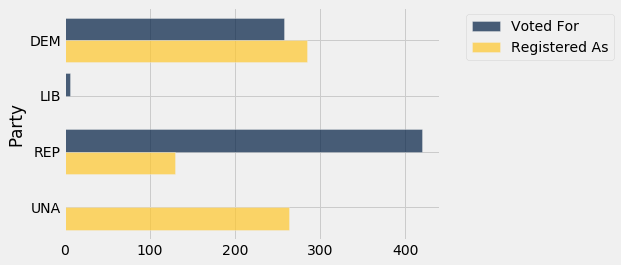

In [31]:
votes = bladen_abs.column("Total Votes")
# Notice that you can request a UNA (unaffiliated) ballot, but cannot vote for an unaffiliated candidate.
# The .append adds in a row for UNA to the votes array so that each column has the same number of rows.
votes = np.append(votes, 0)
comparisons = Table().with_columns("Party", mail_only_parties[0], "Voted For", votes, 
                                     "Registered As", mail_only_parties[1])

comparisons.barh("Party")

## 3. Richmond County: Winning The Election Is A Good-News, Bad-News Kind of Thing. Okay, Now You're The Mayor. The Bad News Is, Now You're The Mayor.

**NOTE: THIS PROBLEM WILL BE CHALLENGING, BUT IT'S GOOD TO LEARN FROM AND WORK THROUGH. PLEASE START EARLY AND COME MEET US FOR OFFICE HOURS IF YOU NEED HELP.**

When you're analyzing data, it's really important to contextualize the numbers we've already calculated by examining the differences when compared to other similarly-calculated numbers. While a better analysis would compare the results of the potential discrepancy to the results in all other counties in North Carolina Congressional District 9, we'll save you the time and only require you to look at one other county: Richmond County. 

We won't break up the analysis as much as we did in the previous section, but you should be able to follow a similar type of procedure to compute the same numbers (***NOTE: This is why it's a good idea to write generalizable functions***). Instead, we'll provide some guidelines and you should provide the code, the calculations, and the explanations to further your analysis. 

**3.1**: Does the same discrepancy of number of absentee votes exist in Richmond County as it does in Bladen County? 

**Some Guidance**

Take a look at how we calculated these values in the previous problem. We are essentially going to do that same work here, but instead of using bladen.csv, we want to use richmond.csv, as that contains the new data we are analyzing. Take note of any differences there are between these two data files! richmond.csv does NOT have an "ABSENTEE" precinct, however, there are still tallied counts for "Absentee by Mail". Other than that, most of the data should have already been cleaned for you.

**General Procedure**
- create the same tables as in Part 2
- create the same graphs
- compute the same values and compare
- create the same visualization


In [32]:
## Fill in your code here. Feel free to break up into multiple cells
## if needed. Make sure to give descriptive variable names so that
## it's easier for us to follow when we grade
...

Ellipsis

**3.2**: Without considering external information, what conclusions can you draw about the North Carolina Congressional District 9 election? Explain in approximately a paragraph that explains the results and any explanations you may have for it.

YOUR ANSWER HERE: 

## 4. Writing Questions: The Greatest Threat To The Constitutional Right To Vote Is Voter Fraud

For the following questions, please elaborate in more than just a few sentences. The questions will be graded on the thoughtfulness of the the answer. Please feel free to bring in as much additional information as you'd like, though be sure to cite your sources when doing so. 

**4.1**: One of the primary reasons why people were able to discover the discrepancy inresults in the North Carolina Congressional District 9 election stems from the strong election transparency laws the state has regarding its elections. What degree of transparency is necessary to ensure elections remain fair? For states that aren't as transparent about their election laws, what policy recommendations do you have to ensure fair and secure elections?

YOUR ANSWER HERE

**4.2**: Recall the `bladen_absentees` table and the data it had inside of it. This information is public and accessible to anyone looking for it. While we haven't talked about it at all over the course of the semester, there are some ethical concerns that are fairly apparent with the data provided. What are some important considerations regarding how this data is being handled and shared? Are there any ethical concerns that secretaries of states should consider?

YOUR ANSWER HERE

**4.3**: If you are a registered voter in the United States, imagine something like this occurred in your district. Who would be the major players (e.g. people, agencies, etc.) involved in the scandal? Are there laws in place that prevent the type of fraudulent behavior seen in North Carolina? If yes, explain those laws and regulations and how it prevents fraud. If no, what policy recommendations would you propose? If you are ineligible to vote in the United States, write about your "home district" whether that may be your district based off your Berkeley address or your home country. Take your pick. 

YOUR ANSWER HERE

## Additional Reading

NC Prosecutor Has Been Probing Election Fraud in 9th District Going Back to 2016: https://www.rollcall.com/news/politics/in-9th-district-n-c-prosecutor-has-been-probing-election-fraud-for-months<br>
North Carolina elections board sets new dates for House election: https://www.reuters.com/article/us-usa-election-north-carolina-idUSKCN1QL29U<br>
Leslie McCrae Dowless: 5 Fast Facts You Need to Know: https://heavy.com/news/2018/12/leslie-mccrae-dowless/<br>
What's Happening in North Carolina's 9th Congressional District: https://www.cnn.com/2018/12/12/politics/north-carolina-district-9-state-of-play/index.html

## Submission

Congratulations, you've reached the end of this coding assignment! To submit, go to datahub.berkeley.edu. Find your file. Click the checkbox next to the file. If it is green, press shutdown. If it isn't lit up, press "Download". After you download it, please rename the file to follow this format, "[YOUR NAME + COLLABORATOR NAME] CODING ASSIGNMENT #2.ipynb", and submit it to the correct bCourses assignment page.

## Quotes

(1) "The problem with political jokes is that they get elected." - Henry Cate VII<br>
(2) "The people who cast the votes decide nothing; the people who count the votes decide everything." - Josef Stalin<br>
(3) "I don't know much about Americanism, but it's a damn good word with which to carry an election." - Warren G. Harding<br>
(4) "Winning the election is a good-news, bad-news kind of thing. Okay, now you're the mayor. The bad news is, now you're the mayor." - Clint Eastwood<br>